# 【申万】罗伯·瑞克超额现金流选股法则复现和延伸探讨


-- 本研报分析基于[【复现】系列十三:罗伯·瑞克超额现金流选股法则](https://www.joinquant.com/view/community/detail/30543ad72454c7648b03bae542af55c9?type=1)，感谢前人抛砖引玉，本文按照思路做了一些重新梳理

-- 更新部分，原分析采用了Tushare来获取部分财务数据，这里调整为全部采用聚宽数据。其中，本文调整了对企业自由现金流的计算方式，作为该现金流选股法的核心，其定义有待商榷，也请指正。最后，原分析采用了调取回测模块来进行计算，本文基于前序[致敬比乔斯基价值选股，对FFScore研报读后再整理](https://www.joinquant.com/view/community/detail/af5f2d96e4ab142bdd1701b14503fec9)的研究整理，将部分方法固化为共享函数，并采取因子化来进行回测验证。

## 1. 理论整理

罗伯·瑞克，华尔街著名的资本大鳄，从事证券行业近 50 年。本篇介绍的罗伯·瑞克超额现金流选股法则是由其在接受股票书籍作者采访时，给投资者的投资建议所提炼而成。

### 1.1 罗伯·瑞克超额现金流选股模型逻辑

罗伯·瑞克投资策略从三个角度对投资标的进行考察

- 估值水平：股票具备合理的估值
- 分红水平：股票具备一定的分红收益
- 财务状况：公司的财务状况要求健康。 

以这三个角度出发，选择了 5 个指标，分别是<font color=Red>市净率、股息收益率、市盈率、借款总额占总资本比例、市现率</font>，共同构建了选股准则，形成了罗伯·瑞克超额现金流选股法则。其中，罗伯·瑞克尤其重视股价和超额现金流的关系，倾向于现金流相对市值更加充足的公司。

整理如下：

- 估值水平：用市净率、市盈率、股价/超额现金流来衡量股票的估值，要求买入的投资标的足够“便宜”，具有合理的估值。
- 分红水平：用股息收益率来衡量股票的分红水平，保证价值投资者能够获得一定的分红收益。
- 财务状况：用借款总额/总资本来衡量公司的偿债能力和财务结构，保证买入的投资标的具备足够强大的资产负债表。 

### 1.2 模型解构

基于罗伯·瑞克的思路和选择的指标，申万整理出的筛选逻辑，如下：

- 市净率低于 1.5 
- 市盈率低于市场平均值
- 股价/超额现金流量比低于 7.5
- 股利收益率高于市场平均值 
- 借款总额占总资本比例低于 33%

结合中国投资市场的实际情况之后，申万提出，在研究和回测中对部分原始标准进行调整： 

- 改为：市净率低于 3
- 改为：股价现金流量比低于全市场平均值的80%

本文将首先以申万版本进行回测

### 1.3 指标定义和解读

这里仅讨论不能直接从因子库里获取的指标，以及对瑞克指标的思考分析：

- 超额现金流等价采用 <font color=Red>自由现金流（FCF）</font>

    做为模型的核心，自由现金流就是企业日常经营活动中产生的，减去各种税费，扣除企业相关投资需求后，能够分配给股东和债权人的最大现金流量。即经营活动产生的现金流量净额 - 股利 - 购买长期资产支出 + 出售长期资产得到的现金。
    
    如果一个企业的自由现金流越大，表明其内部产生现金的能力就越大，其可自由运用的内源资金也越多，企业对外融资的要求也越低，企业的财务状况越健康。此外，由于有真实的现金支出（收付实现制），自由现金流量不容易受会计方法的影响，也不受经理人的操纵，盈余管理（即受经理人操作空间更小的财务指标，但不能完全杜绝）的影响可以尽可能削弱。
    
    由于A股的核准制上市模式，相比较瑞克所在的美股，中国企业本身都受到一定的经营时间和业绩约束，具备良好的经营和业绩基础，因此上市后如果继续健康发展，理论上讲，使用自由现金流量的指标来评判是可行的，即该方法理论上是适应A股市场的。
    
    瑞克采用了股价相除，而股票价值本质上等于未来股利流入的现值，即未来现金流的折现。假设公司的自由现金流量增长量为零，不举债且将全部自由现金流量折现为股利分配给股东，即可以得出理论的股票价格等于平均自由现金流量与必要报酬率（以无风险收益为准）的比值。该比值可以理论上去衡量投资者的投资回报，即当自由现金流大于必要报酬率的倒数时，表明股票的市场价值被高估，反之，表明股票的市场价值被低估。所以，按照瑞克的分析方法，逻辑上是可以选出市场上被错误估价的股票，也就是达到要求买入的投资标的足够“便宜”，具有合理的估值。
    
    所以综上，瑞克认为决定股票内在价值是以股息收入为基础，以现金流贴现来操作，将股票的内在价值等同于其日后获得的全部股息的现值。那么超额现金流的逻辑其实就是在寻找投资对象的内在价值，即当市价低于这一内在稳固基础时，就出现买进的机会，相反，当市价高了内在价值时，就出现卖出的机会。在2022年大盘如此低迷的时期，讨论内在价值，有助于寻找更稳健长期的价值投资标的。

    聚宽中自由现金流因子是不能直接获取的，按照定义，整理得到：自由现金流 = 经营活动产生的现金流量净额 - 分配股利、利润或偿付利息支付的现金 - 购建固定资产、无形资产和其他长期资产支付的现金 + 处置固定资产、无形资产和其他长期资产收回的现金净额。
    
    $FCF = net\_operate\_cash\_flow - dividend\_interest\_payment - fix\_intan\_other\_asset\_acqui\_cash + fix\_intan\_other\_asset\_dispo\_cash$


- 股息率（Dividend Yield Ratio）
    
    在市场存在不确定的情况下，分红即红利策略是难得的避险方式之一，较高股息率的板块也在22年表现亮眼，称为了避险资金的避风港。那么股息率就是一年的税前总派息额与市值的比，是投资收益率的另外一种折现形式。
    
    $股息率 = \frac{每股分红金额 * 分红次数}{股价} = \frac{总分红}{市值}$（注：由于股价存在OHLC和复权，所以以市值计算会更公允简单）
    
    不同公司每年分红次数不同，分红预案也不固定，一般随年报，所以分红的影响应该从披露那天开始，否则会被计入未来函数。
    
    上市公司的分红派息细节其实有多种场景，这导致了股息的定义和取值范围十分宽泛，例如对普通股和优先股的分红划分比例，还有送股和转增，以及AH股间的不同分红比例和汇率差，这里假设以实际现金分红来计算股息，由于转股没有在现金流上有实际支出，所以股息不应该包含转增派息等。
    
    区间统计分两种，静态计算方式以当年12个月实际分红总额，比上时点的总市值；动态TTM计算方式是以最近4个季度的分红总额，比上时点的总市值。两者相比较，动态TTM更适合季度调仓，并且较真实的反应分红或转增对股价的影响。
    
    聚宽中没有现成的股息率，需要自己计算，这也是本文重点关注的计算尝试之二。分红的单位是万元，市值的单位是亿元，其中，由于聚宽的 market_cap 字段包含了 ABH 三个市场，为了合理匹配，这里采用了流通市值来替代，其数据仅包含A股市场。


- 借款占比（$debt\_ratio$）
    
    采用$\frac{长借+短借}{资产总计}$来计算，其中长期借款为$longterm\_loan$，短期借款为$shortterm\_loan$

### 1.4 模型因子化

- **估值水平**
    - 市净率：$pb<3$为1，否则为0
    - 市盈率：$pe\_ttm<pe\_ttm_{avg}$为1，否则为0
    - 内在价值 = 股价/自由现金流：$intr\_value = \frac{close}{FCF}<\frac{close}{FCF}_{avg}*0.8$为1，否则为0


- **分红水平**
    - 股息率：$dv\_ttm>dv\_ttm_{avg}$为1，否则为0


- **财务状况**
    - 借款占比：$debt\_ratio=\frac{longterm\_loan + shortterm\_loan}{total\_assets}<0.33$为1，否则为0

根据上续讨论，对模型构建5因子模型，按总分排序，可以得到模型结果

$LScore = pb + pe + intr\_value + dv\_ttm + debt\_ratio$

## 申万对模型的评价

目前所测试的选股法则并不能算成熟的策略，仍有不足。其一、在 2008 年出现过长达 202 天，幅度为 71%的回撤；其二、策略相对基准的相对强弱波动较大，仅在 2008 年到 2010 年、2013 年后体现出明显的相对优势，而在其他 5 年间没有体现出稳定的相对优势；其三、策略持股个数波动略大，易造成交易执行的问题。当股票个数过少时，隐藏的风险和波动性加大。

申万提出三个简单的优化建议: 

- 吸收罗伯·瑞克超额现金流选股法则中的投资思维，在原有基础上扩展筛选股的考查纬度、或者调整具体的考核指标，进一步优化考察指标的参数
- 对选股数量和行业分布进行调整，利用分散化投资和行业中性的优势来避免策略的大幅波动，减少策略中明显不足的最大回撤指标；
- 将罗伯·瑞克超额现金流选股法则所选出的股票作为股票池，利用其它方法进一步筛选和判断入市时机。

In [8]:
import warnings
warnings.simplefilter('ignore')
import sys
sys.path.append("/home/jquser")

import numpy as np
import pandas as pd
import alphalens as al

from IPython.core.display import display, HTML
from typing import (List, Tuple, Dict, Callable, Union)

from jqdata import *
from jqfactor import Factor
from tqdm import tqdm_notebook
from hs_rd_lib import get_trade_period, get_factor, pkl_batch, get_pool_period_price, plot_cum_return, strategy_performance

display(HTML("<style>.container { width:100% !important; }</style>"))  # Juypter 的显示调整
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

pd.set_option('display.width', 300)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [9]:
class CashflowFactor(Factor):
    name = 'CashflowFactor'
    max_window = 1
    watch_date = None
    #
    dependencies = [
        # 估值水平
        'pb_ratio', 'pe_ratio', 
        'net_operate_cash_flow', 'dividend_interest_payment', 
        'fix_intan_other_asset_acqui_cash', 'fix_intan_other_asset_dispo_cash',
        'close',
        
        # 分红水平
        
        # 财务状况
        'longterm_loan', 'shortterm_loan', 'total_assets',
    ]
    #
    def calc(self, data: Dict) -> None:
        # 估值水平
        pb_ratio: pd.DataFrame = data['pb_ratio']
        pe_ratio: pd.DataFrame = data['pe_ratio']
            
        intr_value: pd.DataFrame = data['close'] / (data['net_operate_cash_flow'] - data['dividend_interest_payment'] - data['fix_intan_other_asset_acqui_cash'] + data['fix_intan_other_asset_dispo_cash'])
            
        # 分红水平
            
        # 财务状况
        debt_ratio: pd.DataFrame = (data['longterm_loan'] + data['shortterm_loan']) / data['total_assets']    
        
        # 储存原始数据
        indicator_tuple: Tuple = (pb_ratio, pe_ratio, intr_value, debt_ratio)  # longterm_loan, shortterm_loan, total_assets)
        self.basic: pd.DataFrame = pd.concat(indicator_tuple).T.replace([-np.inf, np.inf], np.nan)
        self.basic.columns = ['PB', 'PE', 'INTR_VALUE', 'DEBT']  #, 'close', 'longterm_loan', 'shortterm_loan', 'total_assets']
#         self.fscore: pd.Series = self.basic.apply(sign).sum(axis=1)

def get_dv_ttm(code_list, startDt):
    # 获取分红
    f = finance.STK_XR_XD
    q = query(f.code, f.report_date, f.bonus_amount_rmb).filter(
        f.code.in_(code_list), f.report_date>=startDt).order_by(
        f.report_date.asc())    
    df = finance.run_query(q)
    
    df = df.fillna(0)
    df['report_date'] = pd.to_datetime(df['report_date'])
    df.set_index('report_date', drop=True, inplace=True)
    df = df.groupby('code').rolling(2).sum()  # 求TTM分红
    df.dropna(inplace=True)
    
    # 获取市值
    day_list = list(set(df.index.get_level_values(1).astype('str').tolist()))
    q = query(valuation.day, valuation.code, valuation.circulating_market_cap).filter(
        valuation.code.in_(code_list))
    cap = [get_fundamentals(q, date=i) for i in day_list]
    cap_df: pd.DataFrame = pd.concat(cap)
    cap_df.columns = ['report_date', 'code', 'macap']
    cap_df['report_date'] = pd.to_datetime(cap_df['report_date'])
    
    # 计算股息率
    df = df.reset_index().merge(cap_df, on=['report_date', 'code'], how='left')
    df['dv_ttm'] = df.apply(lambda x: x['bonus_amount_rmb'] / 10000 / x['macap'], axis=1)
    df = df[['code', 'report_date', 'dv_ttm']]
    df.columns = ['asset', 'date', 'DV']
#     df = df.groupby(['asset']).resample('M').mean()
    
    return df

## 设置全局参数

In [11]:
# 时间区间
startDt, endDt = '2018-12-31', '2022-01-01'  # for test
# startDt, endDt = '2014-01-01', '2022-05-01'

# 每月初的日期列表，用于获取因子
periods: List = get_trade_period(startDt, endDt, 'ME')

# 股票池
stk_pool = '000300.XSHG'  # 'A'
stock_list = get_index_stocks(stk_pool) # test

# stk_pool = 'A'
# stock_list = get_all_securities(types=['stock']).index.tolist()

# 基准代码
benchmark_code = '000300.XSHG'

## 基础数据获得

In [12]:
# 获取因子构造数据
data_list = list(get_factor(stk_pool, CashflowFactor, periods))
basic_df: pd.DataFrame = pd.concat({f.watch_date: f.basic for f in data_list}, names=['date', 'asset'])

pkl_batch(basic_df, 'basic_df', method='write')
basic_df.head()

PB       PE    INTR_VALUE      DEBT
date       asset                                               
2019-01-31 000001.XSHE  0.8660   7.6796 -5.770953e-08       NaN
           000002.XSHE  2.1881   9.8993 -9.912689e-08  0.103090
           000063.XSHE  3.7110 -12.7823 -5.494452e-08  0.156936
           000069.XSHE  0.9733   5.8322 -1.735365e-08  0.330565
           000100.XSHE  1.2466  11.4723 -8.067098e-10  0.259356

In [4]:
basic_df = pkl_batch(pd.DataFrame(), 'basic_df', method='read')

## 股价获取

为了确保后续数据对齐，所以日期以价格数据为准

In [13]:
# 获取收盘价
stock_price_list = basic_df.index.get_level_values('asset').unique().tolist()
price_periods: List = get_trade_period(basic_df.index.get_level_values('date')[0], basic_df.index.get_level_values('date')[-1], 'D')
price_df = get_pool_period_price(stock_price_list, price_periods, 'open') 

pkl_batch(price_df, 'price_df', method='write')
price_df.head()

True

In [70]:
# 读取数据
price_df = pkl_batch(pd.DataFrame(), 'price_df', method='read')

,time,code,close
0,2016-05-31,000001.XSHE,988.10
1,2016-05-31,000002.XSHE,2892.93
2,2016-05-31,000004.XSHE,274.24
3,2016-05-31,000005.XSHE,71.05
4,2016-05-31,000006.XSHE,307.07


In [16]:
pivot_price = pd.pivot_table(price_df, index='time', columns='code', values='open')
pkl_batch(pivot_price, 'pivot_price', method='write')
pivot_price.head(3)

code,000001.XSHE,000002.XSHE,000063.XSHE,000066.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000301.XSHE,000333.XSHE,000338.XSHE,000402.XSHE,000408.XSHE,000413.XSHE,000415.XSHE,000423.XSHE,000425.XSHE,000503.XSHE,000538.XSHE,000553.XSHE,000568.XSHE,000596.XSHE,000625.XSHE,000627.XSHE,000629.XSHE,000630.XSHE,000651.XSHE,000656.XSHE,000661.XSHE,000671.XSHE,000703.XSHE,000708.XSHE,000709.XSHE,000723.XSHE,000725.XSHE,000728.XSHE,000768.XSHE,000776.XSHE,000783.XSHE,000786.XSHE,000792.XSHE,000800.XSHE,000826.XSHE,000839.XSHE,000858.XSHE,000860.XSHE,000876.XSHE,000895.XSHE,000898.XSHE,000938.XSHE,000959.XSHE,000961.XSHE,000963.XSHE,000977.XSHE,000983.XSHE,001965.XSHE,001979.XSHE,002001.XSHE,002007.XSHE,002008.XSHE,002010.XSHE,002024.XSHE,002027.XSHE,002032.XSHE,002044.XSHE,002049.XSHE,002050.XSHE,002064.XSHE,002065.XSHE,002081.XSHE,002085.XSHE,002120.XSHE,002129.XSHE,002142.XSHE,002146.XSHE,002153.XSHE,002157.XSHE,002179.XSHE,002202.XSHE,002230.XSHE,002236.XSHE,002241.XSHE,002252.XSHE,002271.XSHE,002294.XSHE,002304.XSHE,002310.XSHE,002311.XSHE,002352.XSHE,002371.XSHE,002384.XSHE,002410.XSHE,002411.XSHE,002414.XSHE,002415.XSHE,002422.XSHE,002456.XSHE,002459.XSHE,002460.XSHE,002463.XSHE,002466.XSHE,002468.XSHE,002475.XSHE,002493.XSHE,002508.XSHE,002555.XSHE,002558.XSHE,002568.XSHE,002572.XSHE,002594.XSHE,002600.XSHE,002601.XSHE,002602.XSHE,002607.XSHE,002624.XSHE,002625.XSHE,002673.XSHE,002709.XSHE,002714.XSHE,002736.XSHE,002739.XSHE,002773.XSHE,002791.XSHE,002797.XSHE,002812.XSHE,002821.XSHE,002841.XSHE,002916.XSHE,002925.XSHE,002938.XSHE,002939.XSHE,002945.XSHE,002958.XSHE,003816.XSHE,300003.XSHE,300014.XSHE,300015.XSHE,300017.XSHE,300024.XSHE,300033.XSHE,300059.XSHE,300070.XSHE,300072.XSHE,300122.XSHE,300124.XSHE,300136.XSHE,300142.XSHE,300144.XSHE,300251.XSHE,300274.XSHE,300296.XSHE,300316.XSHE,300347.XSHE,300408.XSHE,300413.XSHE,300433.XSHE,300450.XSHE,300498.XSHE,300529.XSHE,300558.XSHE,300595.XSHE,300601.XSHE,300628.XSHE,300676.XSHE,300677.XSHE,300750.XSHE,300759.XSHE,300760.XSHE,300782.XSHE,300866.XSHE,300888.XSHE,300896.XSHE,300999.XSHE,600000.XSHG,600004.XSHG,600009.XSHG,600010.XSHG,600011.XSHG,600015.XSHG,600016.XSHG,600018.XSHG,600019.XSHG,600023.XSHG,600025.XSHG,600027.XSHG,600028.XSHG,600029.XSHG,600030.XSHG,600031.XSHG,600036.XSHG,600038.XSHG,600048.XSHG,600050.XSHG,600061.XSHG,600066.XSHG,600068.XSHG,600079.XSHG,600085.XSHG,600089.XSHG,600100.XSHG,600104.XSHG,600109.XSHG,600111.XSHG,600115.XSHG,600118.XSHG,600132.XSHG,600143.XSHG,600150.XSHG,600153.XSHG,600157.XSHG,600161.XSHG,600170.XSHG,600176.XSHG,600177.XSHG,600183.XSHG,600188.XSHG,600196.XSHG,600208.XSHG,600219.XSHG,600221.XSHG,600233.XSHG,600271.XSHG,600276.XSHG,600297.XSHG,600299.XSHG,600309.XSHG,600332.XSHG,600339.XSHG,600340.XSHG,600346.XSHG,600352.XSHG,600362.XSHG,600369.XSHG,600372.XSHG,600383.XSHG,600390.XSHG,600398.XSHG,600406.XSHG,600415.XSHG,600426.XSHG,600436.XSHG,600438.XSHG,600482.XSHG,600487.XSHG,600489.XSHG,600498.XSHG,600516.XSHG,600518.XSHG,600519.XSHG,600521.XSHG,600522.XSHG,600535.XSHG,600547.XSHG,600549.XSHG,600566.XSHG,600570.XSHG,600583.XSHG,600584.XSHG,600585.XSHG,600588.XSHG,600600.XSHG,600606.XSHG,600637.XSHG,600655.XSHG,600660.XSHG,600663.XSHG,600674.XSHG,600688.XSHG,600690.XSHG,600703.XSHG,600704.XSHG,600705.XSHG,600733.XSHG,600739.XSHG,600741.XSHG,600745.XSHG,600760.XSHG,600763.XSHG,600795.XSHG,600809.XSHG,600816.XSHG,600837.XSHG,600845.XSHG,600848.XSHG,600867.XSHG,600872.XSHG,600886.XSHG,600887.XSHG,600893.XSHG,600900.XSHG,600905.XSHG,600909.XSHG,600918.XSHG,600919.XSHG,600926.XSHG,600928.XSHG,600958.XSHG,600968.XSHG,600977.XSHG,600989.XSHG,600998.XSHG,600999.XSHG,601006.XSHG,601009.XSHG,601012.XSHG,601018.XSHG,601021.XSHG,601066.XSHG,601077.XSHG,601088.XSHG,601100.XSHG,601108.XSHG,601111.XSHG,601117.XSHG,601138.XSHG,601155.XSHG,601162.XSHG,601166.XSHG,601169.XSHG,601186.XSHG,601198.XSHG,601211.XSHG,601212.XSHG,601216.XSHG,601225.XSHG,601228.XSHG,601229.XSHG,601231.XSHG,601236.XSHG,601238.XSHG,601288.XSHG,601298.XSHG,601318.XSHG

In [ ]:
# 读取数据
pivot_price = pkl_batch(pd.DataFrame(), 'pivot_price', method='read')

## 将基础数据对齐至价格表

In [30]:
date_index = pivot_price.index.unique()

In [52]:
date_df = pd.DataFrame(date_index.tolist(), columns=['price_date'])
date_df = date_df.set_index('price_date').resample('M').sum()

""
price_date
2019-01-31
2019-02-28
2019-03-31
2019-04-30
2019-05-31
2019-06-30
2019-07-31
2019-08-31
2019-09-30


In [28]:
basic_df.index.get_level_values('date').unique()  # 6-30, 8-31, 

Index([2019-01-31, 2019-02-28, 2019-03-29, 2019-04-30, 2019-05-31, 2019-06-28, 2019-07-31, 2019-08-30, 2019-09-30, 2019-10-31, 2019-11-29, 2019-12-31, 2020-01-23, 2020-02-28, 2020-03-31, 2020-04-30, 2020-05-29, 2020-06-30, 2020-07-31, 2020-08-31, 2020-09-30, 2020-10-30, 2020-11-30, 2020-12-31,
       2021-01-29, 2021-02-26, 2021-03-31, 2021-04-30, 2021-05-31, 2021-06-30, 2021-07-30, 2021-08-31, 2021-09-30, 2021-10-29, 2021-11-30, 2021-12-31],
      dtype='object', name='date')

In [35]:
date_index.difference(basic_df.index.get_level_values('date').unique())[:100]

DatetimeIndex(['2019-02-01', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27', '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29', '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22', '2

## 获取股息率数据

In [66]:
bouns_df = get_dv_ttm(stock_list, startDt)
bouns_df.head()

,asset,date,DV
0,000001.XSHE,2016-06-30,0.017199
1,000002.XSHE,2016-06-30,0.033513
2,000004.XSHE,2016-06-30,0.000000
3,000005.XSHE,2016-06-30,0.000000
4,000006.XSHE,2016-06-30,0.016341


In [9]:
bouns_df.info()

NameError: name 'bouns_df' is not defined

## 合成因子数据

In [68]:
# 将因子和股息率数据合并
basic_df.reset_index(inplace=True)
basic_df['date'] = pd.to_datetime(basic_df['date'])
basic_df = basic_df.merge(bouns_df, on=['date', 'asset'], how='outer')

# 调整获取数据的月份数据
basic_df.set_index('date', inplace=True)
basic_df = basic_df.groupby(['asset']).resample('M').mean()

basic_df.head()

PB      PE  INTR_VALUE  DEBT  DV
asset       date                                            
000001.XSHE 2015-12-31  1.0918  7.8525         NaN   NaN NaN
            2016-01-31  1.0317  7.4202         NaN   NaN NaN
            2016-02-29  0.8924  6.4182         NaN   NaN NaN
            2016-03-31  0.8833  6.3527         NaN   NaN NaN
            2016-04-30  0.9445  6.9760         NaN   NaN NaN

In [69]:
# 计算行业平均数据，用于因子的打分判断
avg_df = basic_df.groupby('date').mean().fillna(method='ffill').fillna(0).reset_index()
avg_df = avg_df[['date', 'PE', 'INTR_VALUE', 'DV']]
avg_df.columns = ['date', 'PE_avg', 'INTR_VALUE_avg', 'DV_avg']
avg_df.head()

,date,PE_avg,INTR_VALUE_avg,DV_avg
0,2015-12-31,-95.887981,3.664192e-09,0.0
1,2016-01-31,-84.172281,-3.641009e-08,0.0
2,2016-02-29,-58.655983,1.678901e-07,0.0
3,2016-03-31,-84.529477,4.792822e-08,0.0
4,2016-04-30,78.167387,1.153086e-06,0.0


In [70]:
# 按股票独立打分
cff_df = pd.DataFrame()
for i in tqdm_notebook(range(len(stock_list))):
    df = basic_df.query(f"asset=='{stock_list[i]}'").copy()
    if not df.empty:
        # 将无数据部分填 0
        df[['INTR_VALUE', 'DEBT']] = df[['INTR_VALUE', 'DEBT']].fillna(0)
        df['DV'] = df['DV'].fillna(method='ffill')
        df.dropna(inplace=True)
        df.reset_index()
        df = df.merge(avg_df, on=['date'], how='left')
        # 校对后的数据，进行打分计算
        if not df.empty:
            df['PB_s'] = df['PB'].apply(lambda x: 1 if x<3 else 0)
            df['PE_s'] = df.apply(lambda x: 1 if x['PE']<x['PE_avg'] else 0, axis=1)
            df['INTR_VALUE_s'] = df.apply(lambda x: 1 if x['INTR_VALUE']<x['INTR_VALUE_avg']*0.8 else 0, axis=1)
            df['DV_s'] = df.apply(lambda x: 1 if x['DV']>x['DV_avg'] else 0, axis=1)
            df['DEBT_s'] = df['DEBT'].apply(lambda x: 1 if x<0.33 else 0)
            df['CashflowFactor'] = df.apply(lambda x: x['PB_s'] + x['PE_s'] + x['INTR_VALUE_s'] + x['DV_s'] + x['DEBT_s'], axis=1)
            df['asset'] = stock_list[i]
            cff_df = pd.concat([cff_df, df[['date', 'asset', 'CashflowFactor']]])
cff_df.head()

,date,asset,CashflowFactor
0,2016-06-30,000001.XSHE,4
1,2016-07-31,000001.XSHE,4
2,2016-08-31,000001.XSHE,4
3,2016-09-30,000001.XSHE,4
4,2016-10-31,000001.XSHE,4


## 因子数据存储

In [71]:
pkl_batch(cff_df, 'cff_df', method='write')

True

In [3]:
cff_df = pkl_batch(pd.DataFrame(), 'cff_df', method='read')

## 描述性分析

分布概要
                  count      mean       std  min  25%  50%  75%  max
CashflowFactor  75794.0  2.837573  0.997175  0.0  2.0  3.0  4.0  5.0


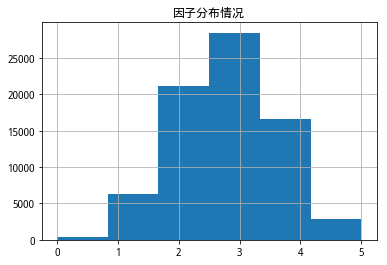

In [72]:
print(f"分布概要\n{cff_df.describe().T}")
plt.title('因子分布情况')
cff_df['CashflowFactor'].hist(bins=6)

有个不成熟的感觉，这套体系在熊市期间容易筛选出结果，牛市期间，该模型基本失效，或者说持股非常集中

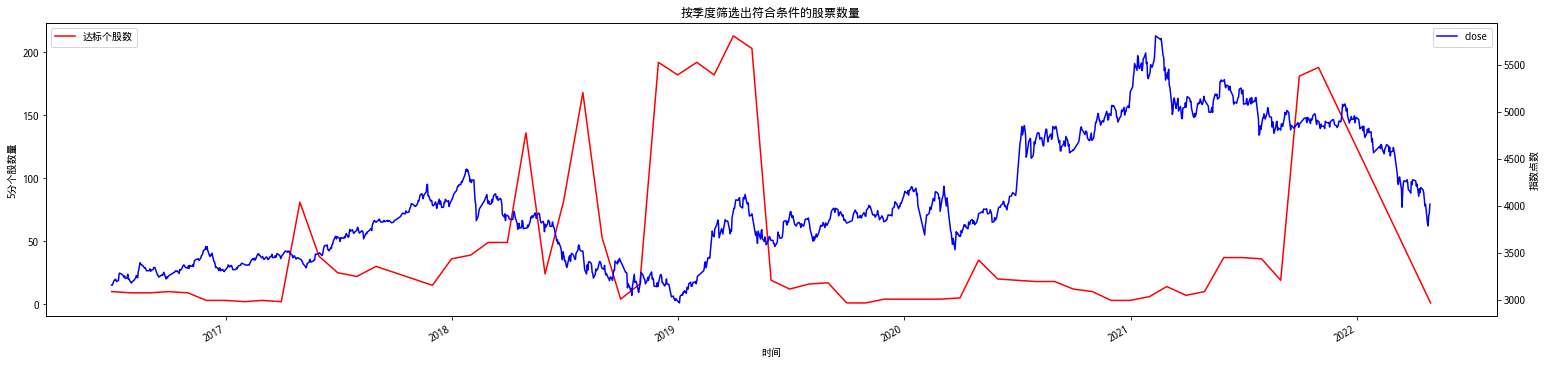

In [73]:
cff_df_5 = cff_df.query("CashflowFactor == 5").groupby('date').size()
benchmark = get_price(benchmark_code, cff_df_5.index[0], cff_df_5.index[-1], fields='close')

fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(111)
cff_df_5.plot(ax=ax1, label='达标个股数', color='r')
ax1.set_ylabel("5分个股数量")
plt.legend(loc=2)
plt.xlabel("时间")

ax2 = ax1.twinx()
benchmark.plot(ax=ax2, label='沪深300行情', color='b')
ax2.set_ylabel("指数点数")
plt.legend(loc=1)

plt.title("按季度筛选出符合条件的股票数量")
plt.show()

# 因子回测分析


In [19]:
pivot_cff = pd.pivot_table(cff_df, index='date', columns='asset', values='CashflowFactor')
# pivot_cff = pivot_cff.reindex(pivot_price.index)
# pivot_cff.fillna(0, inplace=True)
pivot_cff = pivot_cff.stack()
pivot_cff.head()

date        asset      
2016-05-31  000519.XSHE    2.0
2016-06-30  000001.XSHE    4.0
            000005.XSHE    2.0
            000006.XSHE    4.0
            000008.XSHE    2.0
dtype: float64

## 回测

In [27]:
cff_factor = al.utils.get_clean_factor_and_forward_returns(pivot_cff, 
                                                          pivot_price,
                                                          quantiles = 6,#None, #5,
#                                                           bins=[0,2,4,6],
                                                          periods=(1, ),
#                                                           max_loss=0.65
                                                         )

Dropped 100.0% entries from factor data (35.3% after in forward returns computation and 64.7% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


MaxLossExceededError: max_loss (25.0%) exceeded 100.0%, consider increasing it.

In [7]:
pkl_batch(cff_factor, 'cff_factor', method='write')

True

In [3]:
cff_factor = pkl_batch(pd.DataFrame(), 'cff_factor', method='read')

In [34]:
cff_df.groupby('date').size().index[-1]

Timestamp('2022-04-30 00:00:00')

In [37]:
from jqfactor import analyze_factor
far = analyze_factor(factor=pivot_cff, 
                     start_date='2016-05-01',#cff_df.groupby('date').size().index[0], 
                     end_date='2022-06-16',#cff_df.groupby('date').size().index[-1], 
#                      weight_method='mktcap', 
#                      industry='sw_l1', 
                     quantiles=6, 
#                      bins=[0,2,4,6],
                     periods=(1,),
                    max_loss=0.5)
far.create_returns_tear_sheet()

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"


UserError: max_loss (50.0%) exceeded 100.0%, consider increasing it.

## 绩效分析

In [21]:
ret = pd.pivot_table(cff_factor.reindex(), index='date', columns='factor_quantile', values=1)
ret.rename(columns={1.0: '低分组', 2.0:'中间组', 3.0: '高分组'}, inplace=True)
ret.head()

factor_quantile,低分组,中间组,高分组
date,,,
2016-05-31,0.012273,NaN,NaN
2016-06-30,-0.001478,-0.001016,-0.005369
2016-08-31,-0.006949,-0.007701,-0.007590
2016-09-30,0.020251,0.017355,0.015871
2016-10-31,0.011094,0.010656,0.008781


In [11]:
benchmark = get_price(benchmark_code, ret.index[0], ret.index[-1], fields='close')

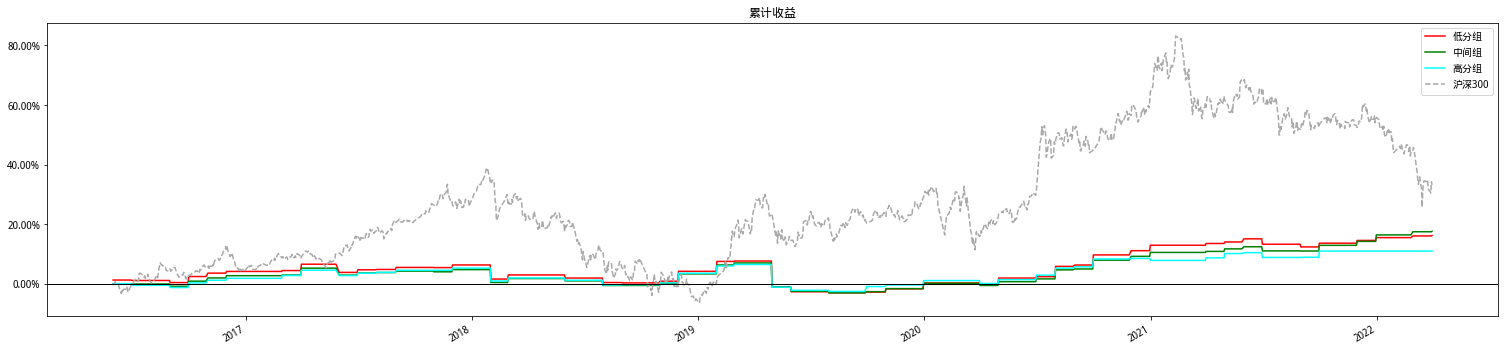

In [22]:
plot_cum_return(title='累计收益', ret=ret[['低分组', '中间组', '高分组']], benchmark_ret=benchmark['close'].pct_change(), benchmark_name='沪深300')

In [23]:
strategy_performance(ret, 'monthly').style.format('{:.2%}')

factor_quantile,低分组,中间组,高分组
年化收益率,3.90%,4.23%,2.69%
累计收益,16.19%,17.62%,10.95%
夏普比,60.56%,70.20%,51.73%
索提诺,nan%,nan%,nan%
波动率,6.71%,6.33%,6.26%
最大回撤,nan%,nan%,nan%
